# World Happiness & Inflation Analysis

This notebook explores the relationships between economic indicators and happiness across countries from 2015 to 2023. In this part of the analysis, the relationship between inflation and happiness is observed through Exploratory Data Analysis (EDA).

**Note: I refer to the 'Score' column as happiness scores throughout the notebook. Whenever happiness scores are mentioned, it refers to the 'Score' column of the dataframe**

In [366]:
# all necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# store data from csv file in a dataframe
df = pd.read_csv('WHI_Inflation.csv')
df.head()

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [368]:
df.info() # tells me non-null counts for each feature and datatype for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

In [370]:
df.describe() # gives me descriptive statistics on my dataset

,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,1232.000000,1200.000000,1090.000000,1130.000000,734.000000,769.000000,1211.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1231.000000
mean,2018.895292,7.395445,6.424233,8.030094,3.512612,5.841887,7.070015,5.499001,1.030767,1.056623,0.588755,0.459393,0.196145,0.133454
std,2.554602,25.165914,16.591503,26.170251,5.513661,13.679284,31.623180,1.135263,0.452230,0.332605,0.244042,0.155579,0.112531,0.115169
min,2015.000000,-3.752996,-23.879999,-22.030001,-28.619415,-83.339781,-26.100000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.402264,0.607611,1.264364,1.041840,-0.283404,1.352541,4.624650,0.736952,0.859935,0.407759,0.370090,0.117000,0.055902
50%,2019.000000,3.476146,2.769178,3.728997,2.245673,2.729256,3.244246,5.538950,1.051500,1.093500,0.617830,0.481000,0.183000,0.098000
75%,2021.000000,6.875713,7.101345,9.293584,4.626995,8.433447,7.079739,6.335750,1.343000,1.313843,0.781501,0.575416,0.252000,0.171000
max,2023.000000,557.210000,306.431673,601.020236,58.851863,128.476638,812.247463,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000


In [372]:
print("Missing values in each column:")
print(df.isnull().sum()) # gives me the number of nulls for each column

Missing values in each column:
Country                                     0
Year                                        0
Headline Consumer Price Inflation          32
Energy Consumer Price Inflation           142
Food Consumer Price Inflation             102
Official Core Consumer Price Inflation    498
Producer Price Inflation                  463
GDP deflator Index growth rate             21
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64


In [374]:
# Headline Consumer Price Inflation is the overall inflation rate based on the Consumer Price Index.
# Score is the World Happiness Index score, where higher values indicate greater happiness.
df_hypothesis_1 = df.dropna(subset=['Headline Consumer Price Inflation', 'Score'])
print("Rows for Hypothesis 1:", len(df_hypothesis_1))

Rows for Hypothesis 1: 1200


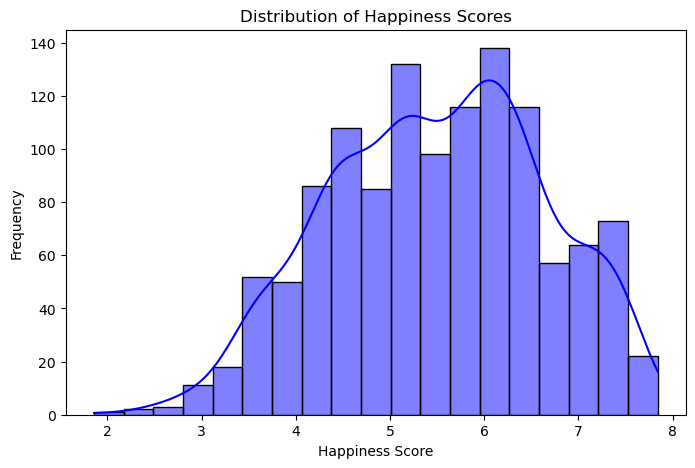

In [376]:
# visualize happiness scores with bins using a histogram from seaborn
plt.figure(figsize=(8,5))
sns.histplot(df['Score'], kde=True, color='blue', edgecolor='black') # kde used to get gridline
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

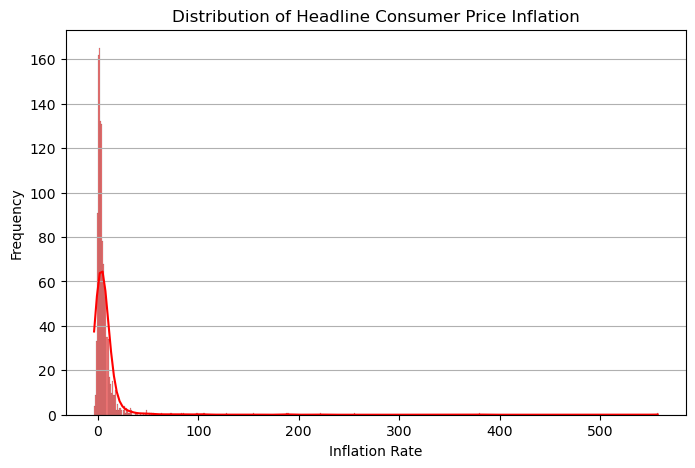

In [378]:
# visualize inflation with bins using a histogram from seaborn
plt.figure(figsize=(8,5))
sns.histplot(df_hypothesis_1['Headline Consumer Price Inflation'], kde=True, color='red', edgecolor='black') # kde used to get gridline
plt.title('Distribution of Headline Consumer Price Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

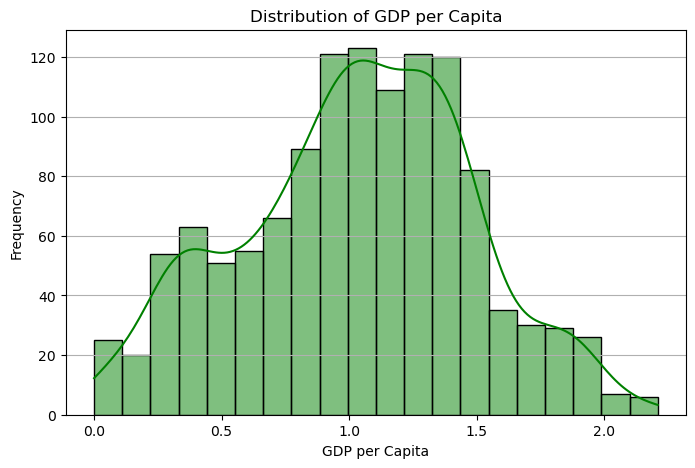

In [379]:
# visualize GDP per capita with bins using a histogram from seaborn
df_hypothesis_2 = df.copy() # store a copy of df for hypothesis 2
plt.figure(figsize=(8,5))
sns.histplot(df_hypothesis_2['GDP per Capita'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

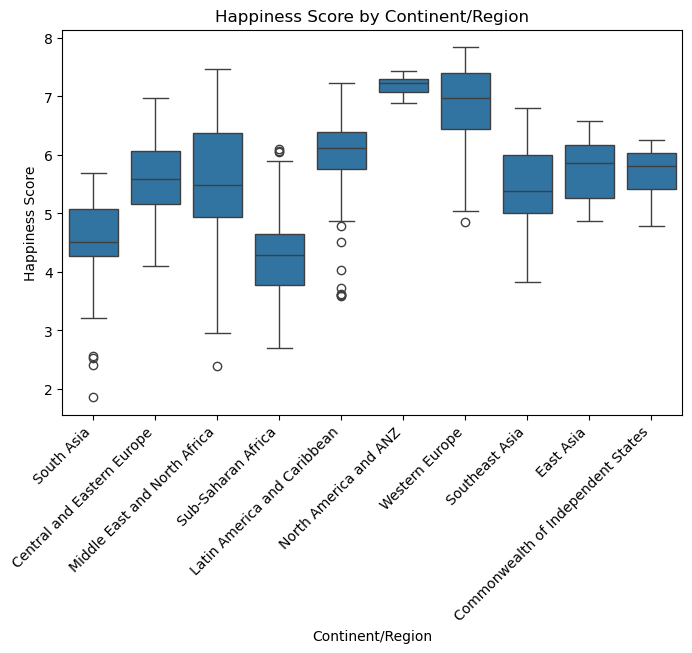

In [382]:
# use boxplots to show happiness scores by different continents/regions because it helps identify outliers by region 
# and displays the median, quartiles, and range of the data per region
plt.figure(figsize=(8,5))
sns.boxplot(x='Continent/Region', y='Score', data=df)
plt.title('Happiness Score by Continent/Region')
plt.xlabel('Continent/Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.show()

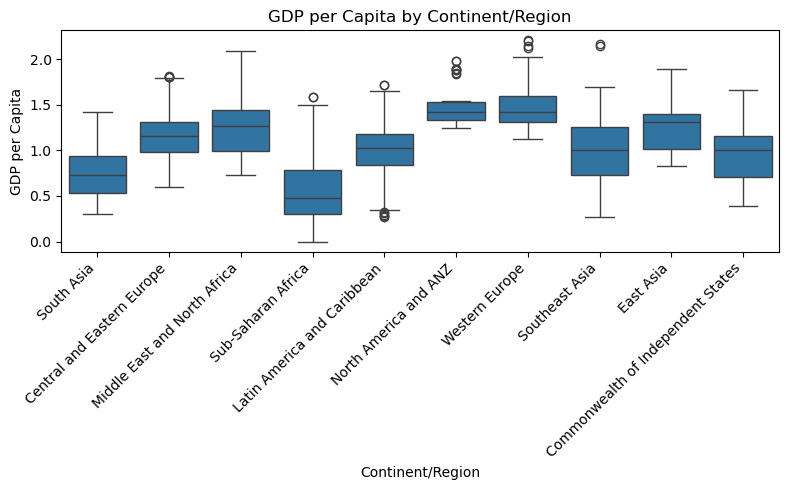

In [384]:
# use boxplots to show GDP per capita for different continents/regions because it helps identify outliers by region 
# and displays the median, quartiles, and range of the data per region
plt.figure(figsize=(8,5))
sns.boxplot(x='Continent/Region', y='GDP per Capita', data=df)
plt.title('GDP per Capita by Continent/Region')
plt.xlabel('Continent/Region')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

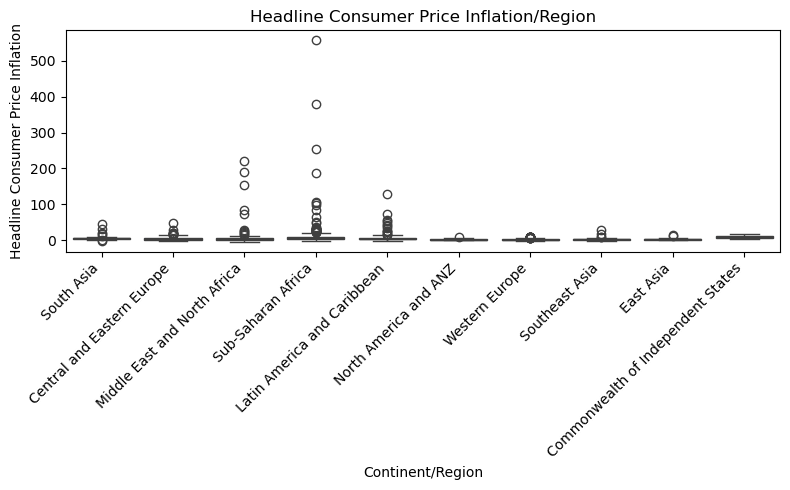

In [386]:
# use boxplots to show Headline Consumer Price Inflation for different continents/regions because it helps identify outliers by region 
# and displays the median, quartiles, and range of the data per region
plt.figure(figsize=(8,5))
sns.boxplot(x='Continent/Region', y='Headline Consumer Price Inflation', data=df)
plt.title('Headline Consumer Price Inflation/Region')
plt.xlabel('Continent/Region')
plt.ylabel('Headline Consumer Price Inflation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Observation for Inflation and Continent/Region:
* The boxplots look compressed because most countries report low inflation rates, while a few extreme outliers force the scale to stretch

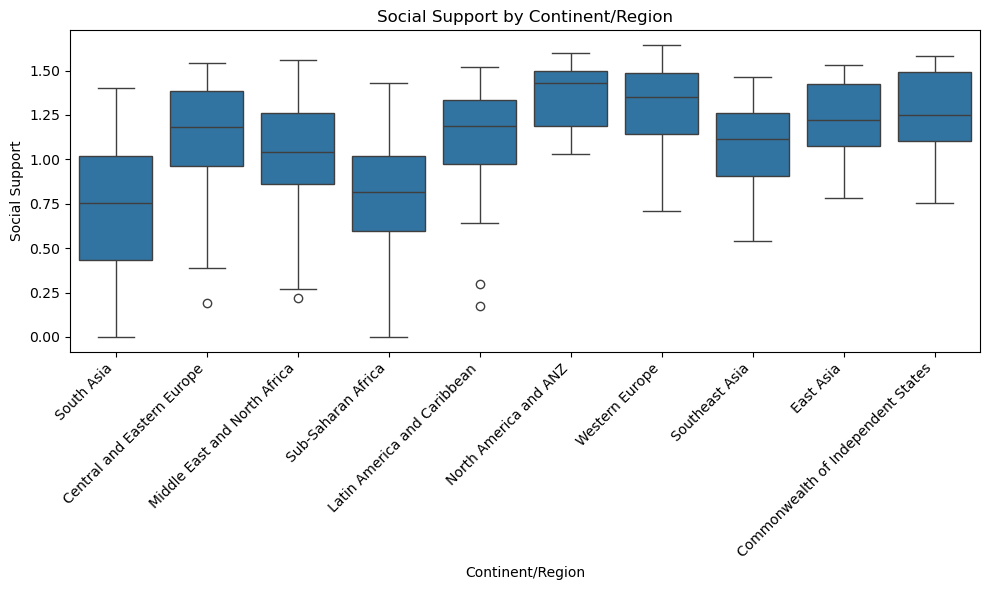

In [419]:
# use boxplots to show social support for different continents/regions because it helps identify outliers by region 
# and displays the median, quartiles, and range of the data per region
plt.figure(figsize=(10,6))
sns.boxplot(x='Continent/Region', y='Social support', data=df_hypothesis_2)
plt.title('Social Support by Continent/Region')
plt.xlabel('Continent/Region')
plt.ylabel('Social Support')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

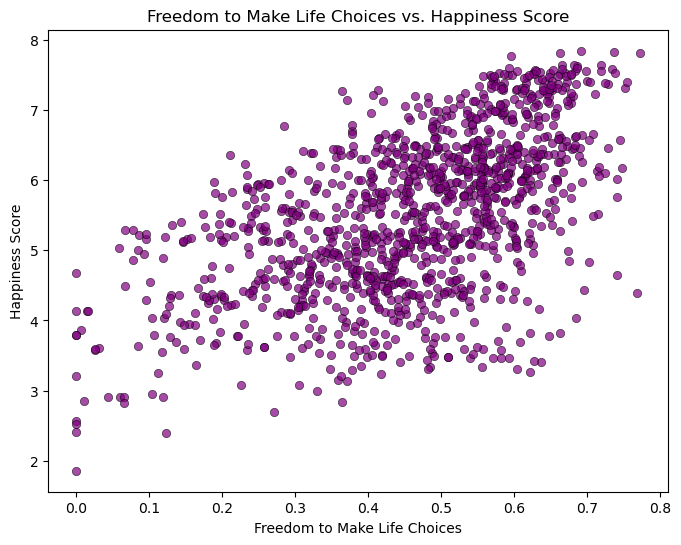

In [417]:
# scatterplot for Freedom to make life choices vs. Happiness Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_hypothesis_2, 
    x='Freedom to make life choices', 
    y='Score', 
    alpha=0.7, 
    color='purple', 
    edgecolor='black'
)
plt.title('Freedom to Make Life Choices vs. Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

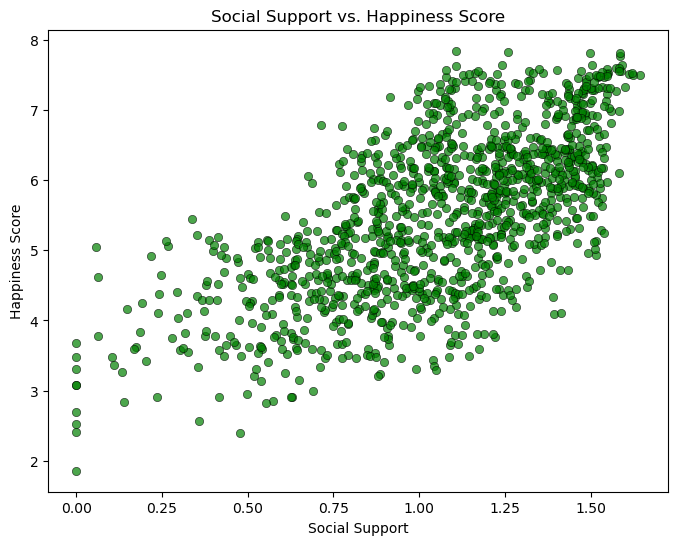

In [392]:
# scatterplot for Social Support vs. Happiness Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='Social support', 
    y='Score', 
    alpha=0.7, 
    color='green', 
    edgecolor='black'
)
plt.title('Social Support vs. Happiness Score')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

# Hypotheses Formulation
**Based on the histograms, boxplots, and scatterplots, I formulated the following hypotheses:**

**Hypothesis 1:** 
* Higher inflation correlates with lower happiness.

**Hypothesis 2:**
* GDP per Capita is positively correlated with happiness.

# Testing Hypothesis 1

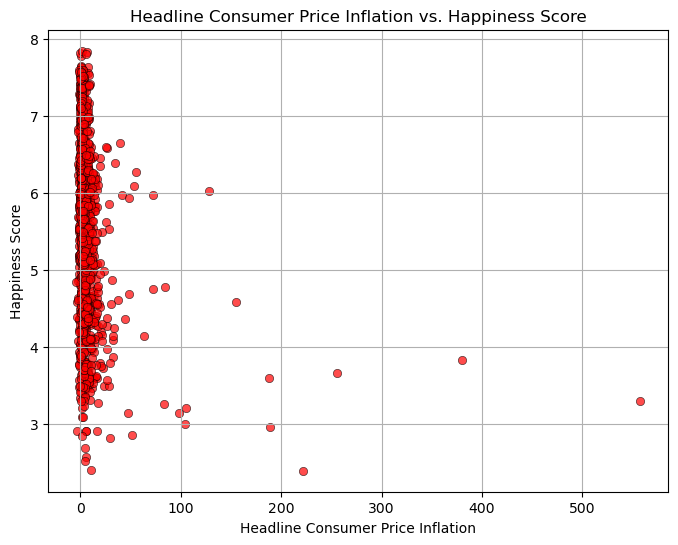

In [415]:
# scatterplot for Headline Consumer Price Inflation vs. Happiness Score
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_hypothesis_1, 
    x='Headline Consumer Price Inflation', 
    y='Score', 
    alpha=0.7, 
    color='red', 
    edgecolor='black'
)
plt.title('Headline Consumer Price Inflation vs. Happiness Score')
plt.xlabel('Headline Consumer Price Inflation')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

In [398]:
# extract variables for analysis
inflation = df_hypothesis_1['Headline Consumer Price Inflation']
happiness = df_hypothesis_1['Score']

pear_corr, pear_pval = pearsonr(inflation, happiness) # measures linear correlation between happiness scores and inflation
spear_corr, spear_pval = spearmanr(inflation, happiness) # measures how strongly happiness scores and inflation are related.

print(f"Pearson correlation: {pear_corr}, p-value: {pear_pval}")
print(f"Spearman correlation: {spear_corr}, p-value: {spear_pval}")

Pearson correlation: -0.1999388840056571, p-value: 2.757533581602172e-12
Spearman correlation: -0.27577600440134525, p-value: 2.19043324773029e-22


# Results and Analysis of Hypothesis Test 1

## Hypotheses
**Null Hypothesis (H0): There is no relationship between Headline Consumer Price Inflation and Happiness Score.**  
* The average Happiness Score for countries with lower inflation is equal to the average Happiness Score for countries with higher inflation.

**Alternative Hypothesis (HA): There is a negative relationship between Headline Consumer Price Inflation and Happiness Score.**
* The average happiness score for countries with lower inflation is greater than the average happiness score for countries with higher inflation.

## Results
**Scatter Plot**
* The scatter plot of Headline Consumer Price Inflation versus Happiness Score shows that while most data cluster at moderate inflation levels with no clear linear trend, a few outliers with extremely high inflation correspond to lower happiness scores.
  
**Correlation Analysis**
- **Pearson correlation:** -0.1999388840056571,
- **Pearson p-value:** 2.757533581602172e-12
- **Spearman correlation:** -0.27577600440134525,
- **Spearman p-value:** 2.19043324773029e-22
     - The Pearson correlation of -0.1999388840056571 indicates a weak to moderate negative linear relationship between inflation and happiness. The Spearman correlation of -0.27577600440134525 confirms a moderate negative relationship. Both p-values are below 0.05, meaning that the results are statistically significant.
 
## Hypothesis 1 Conclusion
Based on the results of the scatterplot, the pearson and spearman correlation metrics, and the p-values for both the correlations, we reject the null hypothesis. The results support the alternative hypothesis that higher inflation correlates with lower happiness.

# Testing Hypothesis 2:

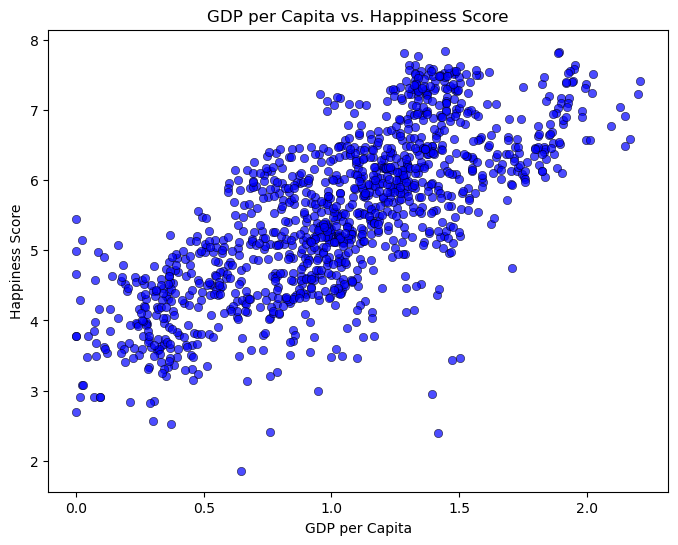

In [402]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_hypothesis_2, 
    x='GDP per Capita', 
    y='Score', 
    alpha=0.7, 
    color='blue', 
    edgecolor='black'
)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [404]:
# Extract variables for Hypothesis 2 analysis
gdp = df_hypothesis_2['GDP per Capita']
score = df_hypothesis_2['Score']

# Calculate Pearson correlation and its p-value
pear_corr_gdp, pear_pval_gdp = pearsonr(gdp, score)

# Calculate Spearman correlation and its p-value
spear_corr_gdp, spear_pval_gdp = spearmanr(gdp, score)

print(f"Pearson correlation (GDP vs. Score): {pear_corr_gdp}, p-value: {pear_pval_gdp}")
print(f"Spearman correlation (GDP vs. Score): {spear_corr_gdp}, p-value: {spear_pval_gdp}")

Pearson correlation (GDP vs. Score): 0.739682681639968, p-value: 8.147420982679755e-214
Spearman correlation (GDP vs. Score): 0.7560846808692013, p-value: 1.0606006979097555e-228


# Results and Analysis of Hypothesis Test 2

## Hypotheses
**Null Hypothesis (H0): There is no relationship between GDP per Capita and Happiness Score.**  
* The average Happiness Score for countries with higher GDP per Capita is equal to the average Happiness Score for countries with lower GDP per Capita.

**Alternative Hypothesis (HA): There is a positive relationship between GDP per Capita and Happiness Score**
* The average happiness score for countries with higher GDP per Capita is greater than the average happiness score for countries with lower GDP per Capita.

## Results
**Scatter Plot**
* The scatter plot of GDP per Capita versus Happiness Score shows a clear upward trend, suggesting that as GDP per Capita increases, Happiness Scores tend to increase.
  
**Correlation Analysis**
- **Pearson correlation:** 0.739682681639968,
- **Pearson p-value:** 8.147420982679755e-214
- **Spearman correlation:** 0.7560846808692013,
- **Spearman p-value:** 1.0606006979097555e-228
     - The Pearson correlation of 0.739682681639968 indicates a strong positive linear relationship between GDP per Capita and happiness. The Spearman correlation of 0.7560846808692013 confirms a positive relationship. Both p-values are significantly below 0.05, meaning that the results are statistically significant.
 
## Hypothesis 2 Conclusion
Based on the results of the scatter plot the pearson and spearman correlation metrics, and the p-values for both the correlations, we reject the null hypothesis. The results strongly support the alternative hypothesis that higher GDP per Capita correlates with higher happiness.

# Summary of Conclusions
## Hypothesis Test 1: Higher Inflation Negatively Correlates with Happiness
* Both the pearson and spearman correlation measures are negative and statistically significant, indicating a negative relationship. This means that, on average, countries with higher inflation tend to have lower happiness scores.

## Hypothesis Test 2: GDP per Capita Positively Correlates with Happiness
* Both the pearson and spearman correlation measures are positive and statistically significant. These strong positive correlations suggest that higher GDP per Capita is associated with higher happiness scores.

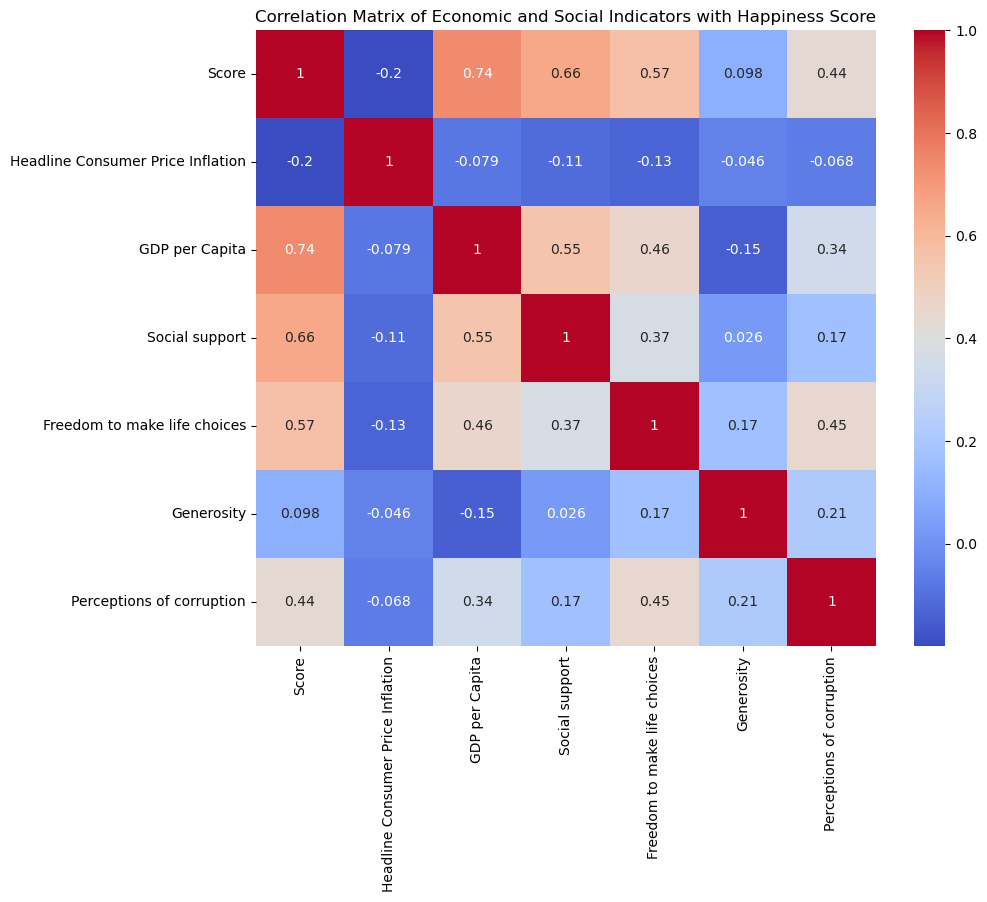

In [408]:
# a correlation matrix shows the correlation coefficient for different variables, 
# and each cell displays the correlation coefficient between two variables
cols = ['Score', 
        'Headline Consumer Price Inflation', 
        'GDP per Capita', 
        'Social support',                       # select features to contruct correlation matrix
        'Freedom to make life choices', 
        'Generosity', 
        'Perceptions of corruption']

# calculate the correlation coefficients between each variable
corr_matrix = df[cols].corr()

# plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Economic and Social Indicators with Happiness Score')
plt.show()

# Observations from Correlation Matrix:
* The matrix shows a negative correlation (-0.2) between inflation (Headline Consumer Price Inflation) and happiness scores, supporting the hypothesis that higher inflation correlates with lower happiness.
* The matrix shows a strong positive correlation (0.74) between GDP per Capita and happiness scores, demonstrating that better economies can correspond to higher happiness scores
* These metrics align with the scatter plots and correlation tests for the hypotheses, which show statistically significant results that reject the null hypotheses
* The matrix also shows a positive correlation (0.66) between social support and happiness scores, showing that as social support increases, happiness scores tend to increase as well.